In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving outbreaks.csv to outbreaks.csv


In [8]:
df = pd.read_csv('outbreaks.csv')
print("Sample Data:")
print(df.head())
print("Dataset Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())

Sample Data:
   Year    Month       State                Location  \
0  1998  January  California              Restaurant   
1  1998  January  California                     NaN   
2  1998  January  California              Restaurant   
3  1998  January  California              Restaurant   
4  1998  January  California  Private Home/Residence   

                                Food Ingredient              Species  \
0                                NaN        NaN                  NaN   
1                            Custard        NaN                  NaN   
2                                NaN        NaN                  NaN   
3                          Fish, Ahi        NaN      Scombroid toxin   
4  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

  Serotype/Genotype     Status  Illnesses  Hospitalizations  Fatalities  
0               NaN        NaN         20               0.0         0.0  
1               NaN        NaN        112               0.0         0

In [13]:
#fixing the missing values issue
df['Location'] = df['Location'].fillna('Unknown')
df['Food'] = df['Food'].fillna('Unknown')
df['Ingredient'] = df['Ingredient'].fillna('Not Specified')
df['Species'] = df['Species'].fillna('Unknown')
df['Serotype/Genotype'] = df['Serotype/Genotype'].fillna('Unknown')
df['Status'] = df['Status'].fillna('Unknown')
df['Hospitalizations'] = df['Hospitalizations'].fillna(0)
df['Fatalities'] = df['Fatalities'].fillna(0)

print("\nUpdated Missing Values:\n")
print(df.isnull().sum())


Updated Missing Values:

Year                 0
Month                0
State                0
Location             0
Food                 0
Ingredient           0
Species              0
Serotype/Genotype    0
Status               0
Illnesses            0
Hospitalizations     0
Fatalities           0
dtype: int64


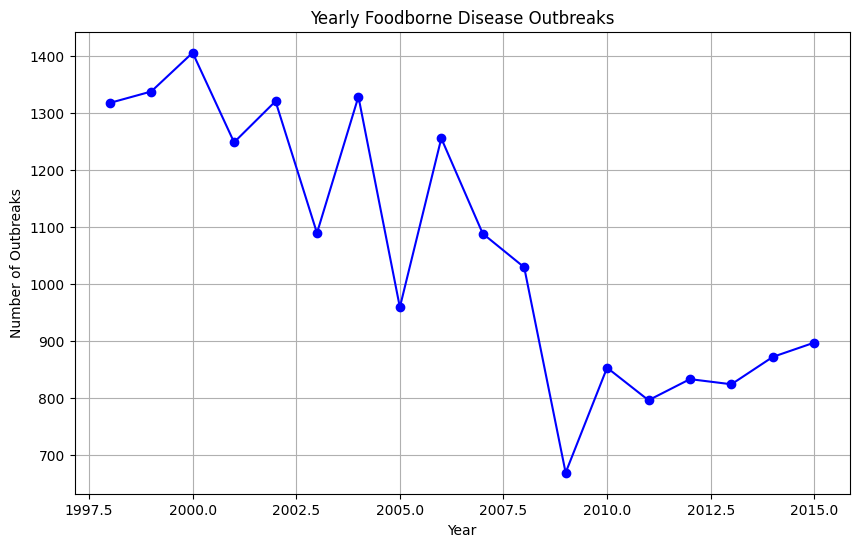


Yearly Illnesses Trend:
 Year
1998    1317
1999    1337
2000    1405
2001    1248
2002    1320
2003    1089
2004    1328
2005     959
2006    1255
2007    1088
2008    1029
2009     669
2010     853
2011     796
2012     833
2013     824
2014     872
2015     897
dtype: int64


In [28]:
#Q1: Are foodborne disease outbreaks increasing or decreasing? (Trend analysis)
outbreaks_per_year = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
plt.plot(outbreaks_per_year.index, outbreaks_per_year.values, marker='o', color='b')
plt.title('Yearly Foodborne Disease Outbreaks')
plt.xlabel('Year')
plt.ylabel('Number of Outbreaks')
plt.grid(True)
plt.show()

print("\nYearly Illnesses Trend:\n", outbreaks_per_year)

In [24]:
#Q2: Which contaminant has caused the most illnesses, hospitalizations, and deaths? (Group and aggregate data)
contaminant_data = df.groupby('Species')[['Illnesses', 'Hospitalizations', 'Fatalities']].sum()
top_contaminants = contaminant_data.sort_values(by='Illnesses', ascending=False)
print("\nTop 5 Contaminants by Illnesses:\n")
print(top_contaminants.head())


Top 5 Contaminants by Illnesses:

                         Illnesses  Hospitalizations  Fatalities
Species                                                         
Unknown                      77954             967.0        27.0
Norovirus genogroup I        76406             668.0         2.0
Salmonella enterica          60018            6888.0        82.0
Norovirus genogroup II       38175             518.0         6.0
Clostridium perfringens      28734             106.0        12.0



Top 5 Risky Locations:
 Location
Restaurant                131970
Unknown                    66015
Catering Service           36044
Private Home/Residence     22564
Prison/Jail                20608
Name: Illnesses, dtype: int64


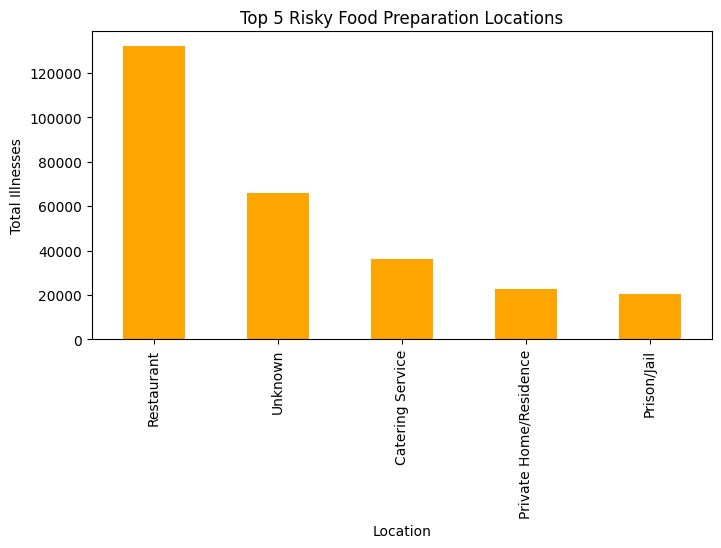

In [27]:
#Q3 What locations pose the greatest risk? (Analysing based on Location)
location_risks = df.groupby('Location')['Illnesses'].sum().sort_values(ascending=False)
print("\nTop 5 Risky Locations:\n", location_risks.head())

location_risks.head(5).plot(kind='bar', figsize=(8, 4), color='orange')
plt.title('Top 5 Risky Food Preparation Locations')
plt.xlabel('Location')
plt.ylabel('Total Illnesses')
plt.show()